# Oil Price Prediction Project

## Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Part  1

#### Loading the dataset

In [5]:
df = pd.read_csv('brent_oil_weekly_30_years.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,04/09/2023,84.46,85.23,85.52,84.11,NaN,-0.78%
1,04/02/2023,85.12,86.00,86.44,83.50,1.29M,6.55%
2,03/26/2023,79.89,74.62,79.95,74.39,1.68M,6.53%
3,03/19/2023,74.99,73.01,77.44,70.12,1.06M,2.77%
4,03/12/2023,72.97,82.60,83.48,71.40,2.13M,-11.85%


#### Changing the type of every column to a more proper one and changing the NaN fields

In [6]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [7]:
df.isna().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [9]:
def convert_volume(val):
    if val[-1] == 'M':
        return int(float(val[:-1]) * 1000000)
    elif val[-1] == 'K':
        return int(float(val[:-1]) * 1000)
    else:
        return int(val)

In [10]:
df['Vol.'] = df['Vol.'].astype('str')
df['Vol.'][0] = '0'
df['Vol.'] = df['Vol.'].apply(convert_volume)

In [11]:
df['Vol.'][0] = int(df['Vol.'].mean())
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-04-09,84.46,85.23,85.52,84.11,601114,-0.78%
1,2023-04-02,85.12,86.00,86.44,83.50,1290000,6.55%
2,2023-03-26,79.89,74.62,79.95,74.39,1680000,6.53%
3,2023-03-19,74.99,73.01,77.44,70.12,1060000,2.77%
4,2023-03-12,72.97,82.60,83.48,71.40,2130000,-11.85%


In [12]:
df['Change %'] = pd.to_numeric(df['Change %'].str.strip('%'))
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-04-09,84.46,85.23,85.52,84.11,601114,-0.78
1,2023-04-02,85.12,86.00,86.44,83.50,1290000,6.55
2,2023-03-26,79.89,74.62,79.95,74.39,1680000,6.53
3,2023-03-19,74.99,73.01,77.44,70.12,1060000,2.77
4,2023-03-12,72.97,82.60,83.48,71.40,2130000,-11.85


#### Plot time series

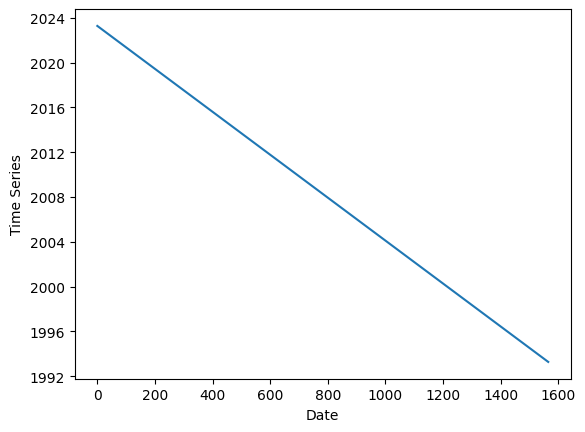

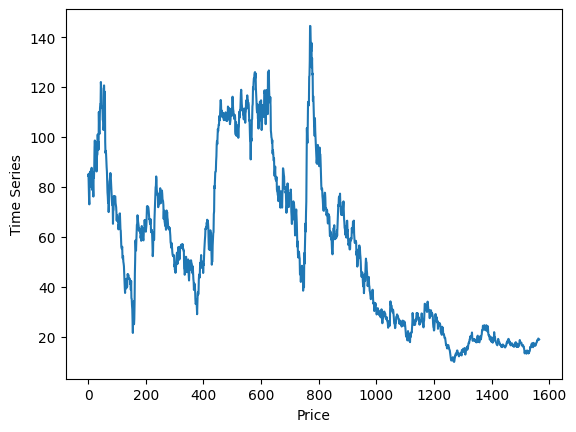

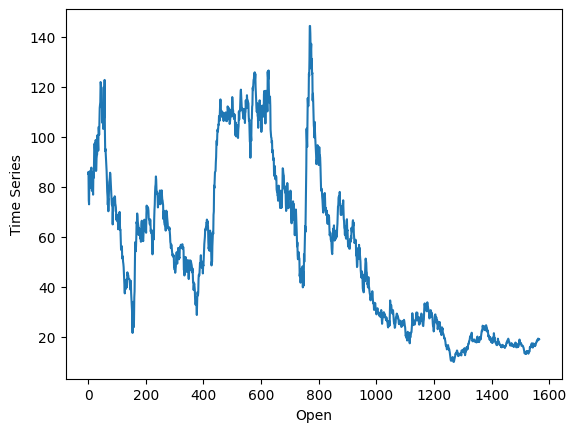

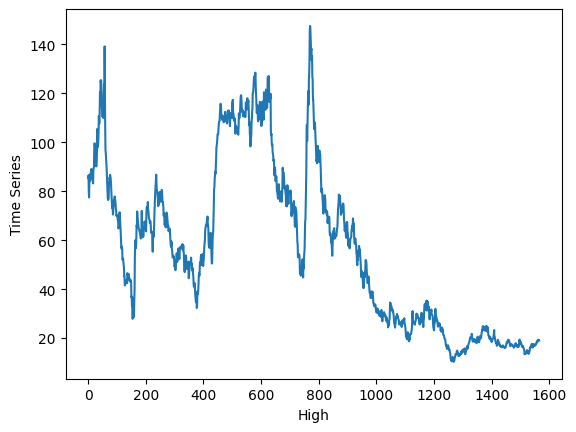

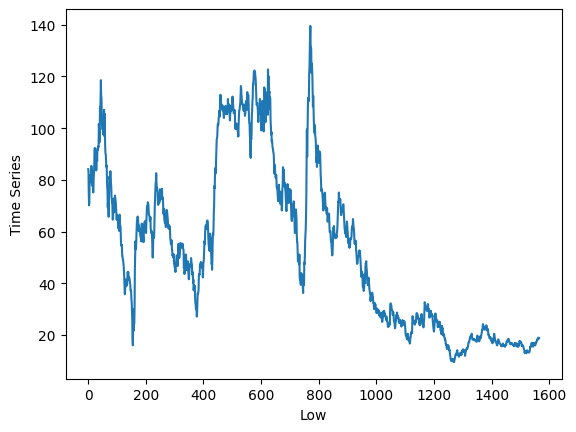

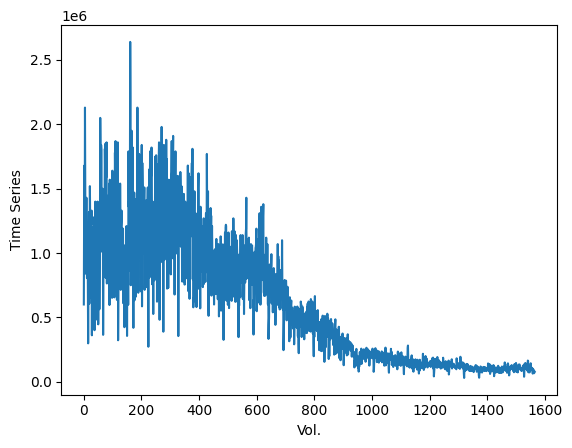

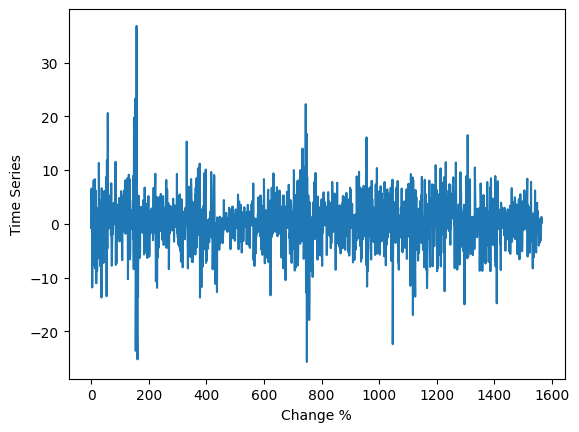

In [13]:
for feature in df.columns:
    plt.plot(df[feature])
    plt.xlabel(feature)
    plt.ylabel('Time Series')
    plt.show()

## Part 2

#### Function for Making new dataframe 

In [14]:
def make_time_series(df, n, m):
    df_new = pd.DataFrame()
    df_new['Date'] = df['Date']

    for i in range(1, n+1):
        df_new['Price_t-'+str(i)] = df['Price'].shift(i)
        df_new['Open_t-'+str(i)] = df['Open'].shift(i)
        df_new['High_t-'+str(i)] = df['High'].shift(i)
        df_new['Low_t-'+str(i)] = df['Low'].shift(i)
        df_new['Vol._t-'+str(i)] = df['Vol.'].shift(i)
        df_new['Change %_t-'+str(i)] = df['Change %'].shift(i)

    for i in range(1, m+1):
        df_new['Price_t+'+str(i)] = df['Price'].shift(-i)
    
    return df_new

## Part 3

#### Split train and test data 

In [15]:
test_data = df[df['Date'].dt.year >= 2019]
train_data = df[df['Date'].dt.year < 2019]

X_train = df[df['Date'].dt.year < 2019].drop('Price', axis=1)
y_train = df[df['Date'].dt.year < 2019]['Price']

X_test = df[df['Date'].dt.year >= 2019].drop('Price', axis=1)
y_test = df[df['Date'].dt.year >= 2019]['Price']

## Part 4

#### Making new datframes

In [16]:
train_data_new = make_time_series(train_data , 8 , 1)
train_data_new = train_data_new.fillna(train_data_new.mean())
train_data_new.drop('Date' , axis=1 , inplace=True)

test_data_new = make_time_series(test_data , 8 , 1)
test_data_new = test_data_new.fillna(test_data_new.mean())
test_data_new.drop('Date' , axis=1 , inplace=True)

X_test_new = test_data_new

#### Prediction using LinearRegression model 

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(train_data_new , y_train)

In [18]:
y_pred_lr = lr.predict(X_test_new)

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for LinearRegression:', mean_absolute_error(y_pred_lr, y_test))
print('Mean Squared Error for LinearRegression:', mean_squared_error(y_pred_lr, y_test))

Mean Absolute Error for LinearRegression: 0.6152021131820149
Mean Squared Error for LinearRegression: 2.0106821354795397


#### Prediction using GradientBoostingRegressor model

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor().fit(train_data_new , y_train)

In [21]:
y_pred_gb = gb.predict(X_test_new)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for GradientBoostingRegressor:', mean_absolute_error(y_pred_gb, y_test))
print('Mean Squared Error for GradientBoostingRegressor:', mean_squared_error(y_pred_gb, y_test))

Mean Absolute Error for GradientBoostingRegressor: 0.7050652192769818
Mean Squared Error for GradientBoostingRegressor: 2.167115239092671


#### Prediction using SVR model

In [23]:
from sklearn.svm import SVR

svr = SVR().fit(train_data_new , y_train)

In [24]:
y_pred_svr = svr.predict(X_test_new)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for SVR:', mean_absolute_error(y_pred_svr, y_test))
print('Mean Squared Error for SVR:', mean_squared_error(y_pred_svr, y_test))

Mean Absolute Error for SVR: 18.418785072202304
Mean Squared Error for SVR: 590.4905771702729


#### Prediction using DecisionTreeRegressor model

In [26]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor().fit(train_data_new , y_train)

In [27]:
y_pred_dt = dt.predict(X_test_new)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for DecisionTreeRegressor:', mean_absolute_error(y_pred_dt, y_test))
print('Mean Squared Error for DecisionTreeRegressor:', mean_squared_error(y_pred_dt, y_test))

Mean Absolute Error for DecisionTreeRegressor: 0.8600448430493276
Mean Squared Error for DecisionTreeRegressor: 2.6662560538116575


## Part 5

#### Plotting real values and predictions for different models 

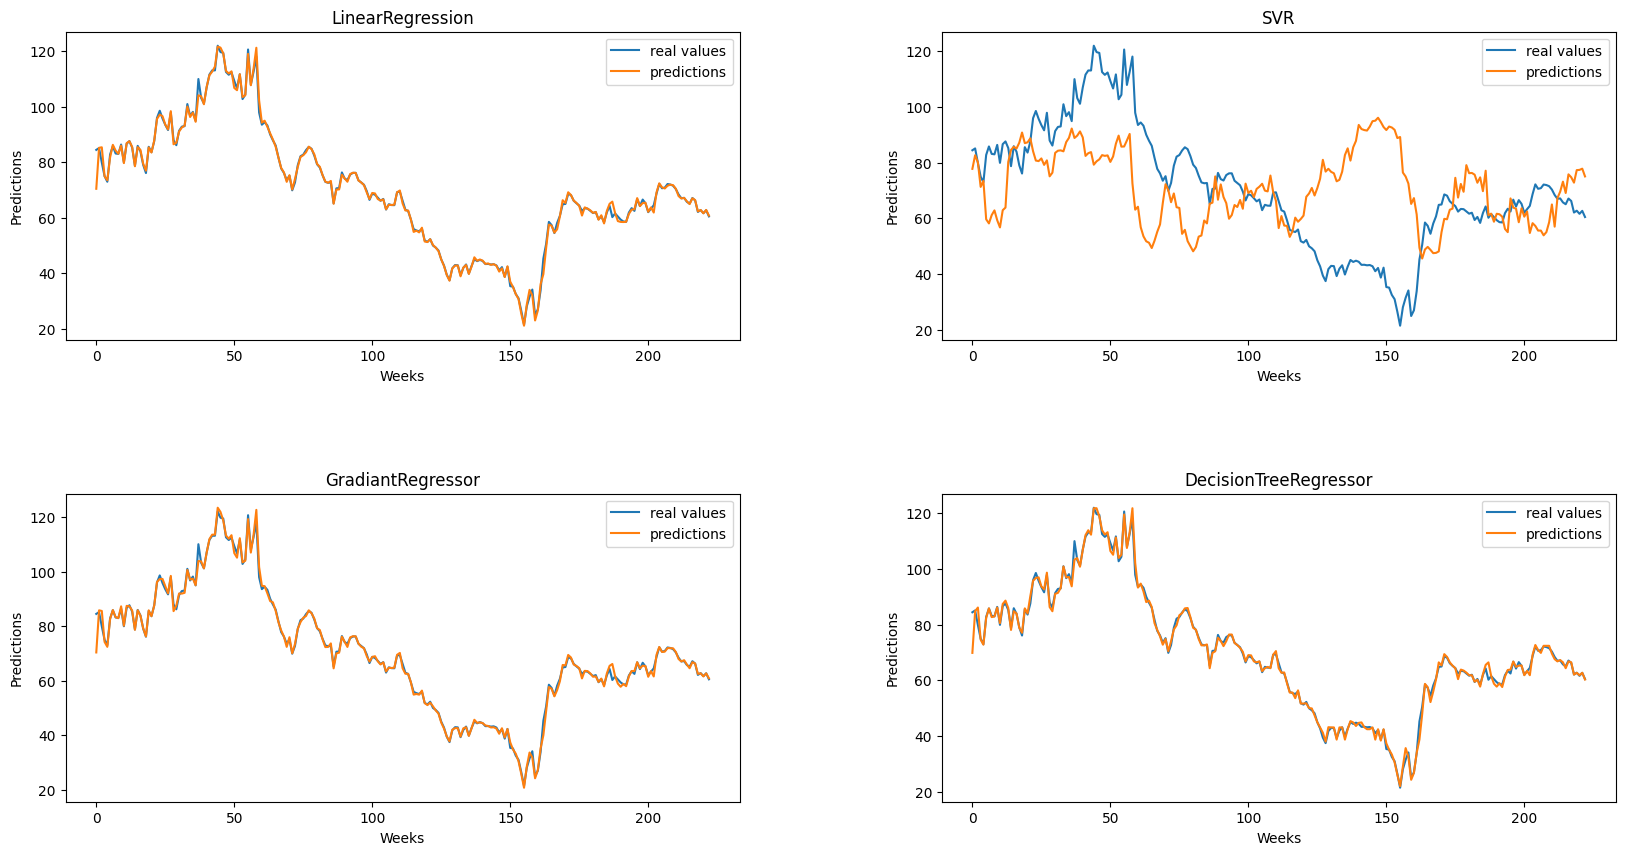

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

ax[0][0].plot(y_test, label='real values')
ax[0][0].plot(y_pred_lr, label='predictions')
ax[0][0].set_title('LinearRegression')
ax[0][0].set_xlabel('Weeks')
ax[0][0].set_ylabel('Predictions')
ax[0][0].legend()

ax[0][1].plot(y_test, label='real values')
ax[0][1].plot(y_pred_svr, label='predictions')
ax[0][1].set_title('SVR')
ax[0][1].set_xlabel('Weeks')
ax[0][1].set_ylabel('Predictions')
ax[0][1].legend()

ax[1][0].plot(y_test, label='real values')
ax[1][0].plot(y_pred_gb, label='predictions')
ax[1][0].set_title('GradiantRegressor')
ax[1][0].set_xlabel('Weeks')
ax[1][0].set_ylabel('Predictions')
ax[1][0].legend()

ax[1][1].plot(y_test, label='real values')
ax[1][1].plot(y_pred_dt, label='predictions')
ax[1][1].set_title('DecisionTreeRegressor')
ax[1][1].set_xlabel('Weeks')
ax[1][1].set_ylabel('Predictions')
ax[1][1].legend()

plt.show()

## Part 6

#### Finding the best n

In [30]:
accs = []
for i in range(1,15):
    train_data_new_temp = make_time_series(train_data , i , 1)
    train_data_new_temp = train_data_new_temp.fillna(train_data_new_temp.mean())
    train_data_new_temp.drop('Date' , axis=1 , inplace=True)

    test_data_new_temp = make_time_series(test_data , i , 1)
    test_data_new_temp = test_data_new_temp.fillna(test_data_new_temp.mean())
    test_data_new_temp.drop('Date' , axis=1 , inplace=True)
    X_test_new_temp = test_data_new_temp
    
    lr_temp = LinearRegression().fit(train_data_new_temp , y_train)

    y_pred_lr_temp = lr_temp.predict(X_test_new_temp)
    
    accs.append( mean_squared_error(y_pred_lr_temp, y_test))

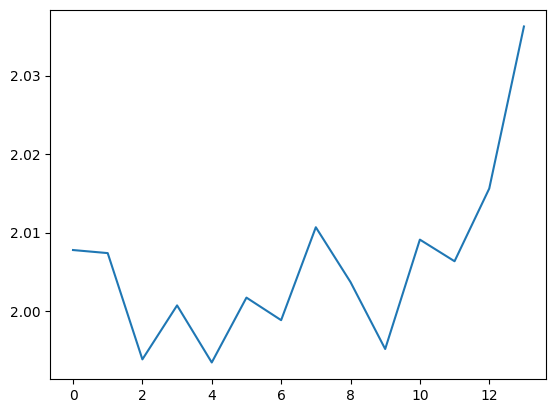

Best Score at n = 5


In [31]:
plt.plot(accs)
plt.show()
print(f"Best Score at n = {np.argmin(accs)+1}")

## Part 7

#### Function for Making new dataframe 

In [32]:
def make_time_series_use_all_features(df, n, m):
    df_new = pd.DataFrame()
    df_new['Date'] = df['Date']

    for i in range(1, n+1):
        df_new['Price_t-'+str(i)] = df['Price'].shift(i)
        df_new['Open_t-'+str(i)] = df['Open'].shift(i)
        df_new['High_t-'+str(i)] = df['High'].shift(i)
        df_new['Low_t-'+str(i)] = df['Low'].shift(i)
        df_new['Vol._t-'+str(i)] = df['Vol.'].shift(i)
        df_new['Change %_t-'+str(i)] = df['Change %'].shift(i)

    for i in range(1, m+1):
        df_new['Price_t+'+str(i)] = df['Price'].shift(-i)
        df_new['Open_t+'+str(i)] = df['Open'].shift(-i)
        df_new['High_t+'+str(i)] = df['High'].shift(-i)
        df_new['Low_t+'+str(i)] = df['Low'].shift(-i)
        df_new['Vol._t+'+str(i)] = df['Vol.'].shift(-i)
        df_new['Change %_t+'+str(i)] = df['Change %'].shift(-i)
    
    return df_new

#### Making new datframes

In [33]:
train_data_new2 = make_time_series_use_all_features(train_data, 5, 1)
train_data_new2 = train_data_new2.fillna(train_data_new2.mean())
train_data_new2.drop('Date' , axis=1 , inplace=True)

test_data_new2 = make_time_series_use_all_features(test_data, 5, 1)
test_data_new2 = test_data_new2.fillna(test_data_new2.mean())
test_data_new2.drop('Date' , axis=1 , inplace=True)

X_test_new2 = test_data_new2

#### Prediction using LinearRegression model 

In [34]:
from sklearn.linear_model import LinearRegression

lr2 = LinearRegression().fit(train_data_new2, y_train)

In [35]:
y_pred_lr2 = lr2.predict(X_test_new2)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Mean Absolute Error for LinearRegression with all features:', mean_absolute_error(y_pred_lr2, y_test))
print('Mean Squared Error for LinearRegression with all features:', mean_squared_error(y_pred_lr2, y_test))

Mean Absolute Error for LinearRegression with all features: 0.5939255372178707
Mean Squared Error for LinearRegression with all features: 1.9911771675843797


## Part 8

#### Finding 12 most important features using Forward Selection

In [37]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

lr3 = LinearRegression()
sfs = SequentialFeatureSelector(lr3, n_features_to_select=12, direction='forward').fit(train_data_new2, y_train)

In [38]:
selected_indices = sfs.get_support(indices=True)
selected_features = list(train_data_new2.columns[selected_indices])
print(selected_features)

['Open_t-1', 'Change %_t-1', 'Price_t-2', 'High_t-2', 'Low_t-2', 'Vol._t-2', 'Open_t-3', 'Vol._t-3', 'Price_t-5', 'Change %_t-5', 'Price_t+1', 'Change %_t+1']


In [39]:
train_data_best_features = train_data_new2.loc[:, selected_features]
train_data_best_features

,Open_t-1,Change %_t-1,Price_t-2,High_t-2,Low_t-2,Vol._t-2,Open_t-3,Vol._t-3,Price_t-5,Change %_t-5,Price_t+1,Change %_t+1
223,52.63076,0.184836,52.674609,54.209433,50.963967,5.055609e+05,52.681104,5.058879e+05,52.750157,0.186181,52.200000,-3.010000
224,53.00000,9.310000,52.674609,54.209433,50.963967,5.055609e+05,52.681104,5.058879e+05,52.750157,0.186181,53.820000,-10.720000
225,53.49000,-3.010000,57.060000,58.310000,52.510000,1.010000e+06,52.681104,5.058879e+05,52.750157,0.186181,60.280000,-2.250000
226,60.25000,-10.720000,52.200000,55.290000,49.930000,2.729200e+05,53.000000,1.010000e+06,52.750157,0.186181,61.670000,5.040000
227,61.34000,-2.250000,53.820000,61.210000,52.790000,1.490000e+06,53.490000,2.729200e+05,52.750157,0.186181,58.710000,-0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...
1561,18.48000,-0.910000,18.600000,18.730000,18.310000,8.175000e+04,18.610000,6.437000e+04,17.560000,-0.570000,19.190000,0.210000
1562,19.25000,-3.070000,18.430000,18.530000,18.100000,9.805000e+04,18.430000,8.175000e+04,17.660000,-3.550000,19.150000,1.270000
1563,19.25000,0.210000,18.600000,19.270000,18.510000,8.964000e+04,18.480000,9.805000e+04,18.310000,-1.560000,18.910000,0.530000
1564,18.98000,1.270000,19.190000,19.300000,18.960000,7.882000e+04,19.250000,8.964000e+04,18.600000,0.920000,18.810000,0.210000


In [40]:
train_data_best_features = train_data_new2.loc[:, selected_features]

X_test_best_featues = test_data_new2.loc[:, selected_features]

In [41]:
lr_best_features = LinearRegression().fit(train_data_best_features,y_train)
y_pred_best_features = lr_best_features.predict(X_test_best_featues)

In [42]:
print('Mean Absolute Error for LinearRegression with 12 best features:', mean_absolute_error(y_pred_best_features, y_test))
print('Mean Squared Error for LinearRegression with 12 best features:', mean_squared_error(y_pred_best_features, y_test))

Mean Absolute Error for LinearRegression with 12 best features: 0.595426771299723
Mean Squared Error for LinearRegression with 12 best features: 2.073480330323423


## Part 9

#### Selecting 4 future weeks and 12 previous weeks from dataframe

In [43]:
df_16_Weeks = df.iloc[:16]
df_16_Weeks

,Date,Price,Open,High,Low,Vol.,Change %
0,2023-04-09,84.46,85.23,85.52,84.11,601114,-0.78
1,2023-04-02,85.12,86.00,86.44,83.50,1290000,6.55
2,2023-03-26,79.89,74.62,79.95,74.39,1680000,6.53
3,2023-03-19,74.99,73.01,77.44,70.12,1060000,2.77
4,2023-03-12,72.97,82.60,83.48,71.40,2130000,-11.85
5,2023-03-05,82.78,85.83,86.75,80.73,1490000,-3.55
6,2023-02-26,85.83,83.19,86.00,81.73,840910,3.21
7,2023-02-19,83.16,83.15,84.30,80.40,893440,0.19
8,2023-02-12,83.00,86.51,86.95,81.80,1190000,-3.92
9,2023-02-05,86.39,79.61,86.90,79.10,1430000,8.07


In [44]:
train_data_12_weeks = df_16_Weeks.iloc[:12]
y_train_12_weeks = train_data_12_weeks['Price']
X_train_12_weeks = train_data_12_weeks.drop(['Price' , 'Date'] , axis=1)

test_data_4_weeks = df_16_Weeks.iloc[-4:]
y_test_4_weeks = test_data_4_weeks['Price']
X_test_4_weeks = test_data_4_weeks.drop(['Price' , 'Date'] , axis=1)

#### Prediction using LinearRegression

In [45]:
lr_12_weeks = LinearRegression().fit(X_train_12_weeks, y_train_12_weeks)

In [46]:
y_pred_lr_4_weeks = lr_12_weeks.predict(X_test_4_weeks)
print(mean_squared_error(y_pred_lr_4_weeks , y_test_4_weeks))

1.5825724944588286


#### Prediction using GradientBoostingRegressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

gb_12_weeks = GradientBoostingRegressor().fit(X_train_12_weeks, y_train_12_weeks)

In [48]:
y_pred_gb_4_weeks = gb_12_weeks.predict(X_test_4_weeks)
print(mean_squared_error(y_pred_gb_4_weeks , y_test_4_weeks))

3.3803909355348063


#### Finding best parameters for GradientBoostingRegressor

In [49]:
from sklearn.model_selection import GridSearchCV


gb2 = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_gb = GridSearchCV(estimator=gb2 , param_grid=param_grid , cv=2 , n_jobs=-1 , verbose=1).fit(X_train_12_weeks,y_train_12_weeks)

Fitting 2 folds for each of 243 candidates, totalling 486 fits


In [50]:
gb_best = GradientBoostingRegressor(**grid_search_gb.best_params_).fit(X_train_12_weeks,y_train_12_weeks)
y_pred_gb2  = gb_best.predict(X_test_4_weeks)

In [51]:
print(mean_squared_error(y_test_4_weeks,y_pred_gb2))

0.7701749999999982


## Part 10

Q: Which model was the best?

A: Linear Regression

## Part 11

#### Use Empirical Mode Decomposition method for prediction

In [83]:
from PyEMD import EMD
emd = EMD()

TypeError: 'module' object is not callable

In [69]:
imfs = emd(df['Price'].values)
short_term = imfs[0]
mid_term = imfs[1:4].sum(axis=0)
long_term = imfs[4:].sum(axis=0)

df_emd = df.copy()


TypeError: 'module' object is not callable

In [ ]:
df_emd['short_term'] = short_term
df_emd['mid_term'] = mid_term
df_emd['long_term'] = long_term

In [ ]:

df_16_Weeks_emd = df_emd.iloc[:16]

train_data_12_weeks_emd = df_16_Weeks_emd.iloc[:12]
y_train_12_weeks_emd = train_data_12_weeks_emd['Price']
X_train_12_weeks_emd = train_data_12_weeks_emd.drop(['Price' , 'Date'] , axis=1)

test_data_4_weeks_emd = df_16_Weeks_emd.iloc[-4:]
y_test_4_weeks_emd = test_data_4_weeks_emd['Price']
X_test_4_weeks_emd = test_data_4_weeks_emd.drop(['Price' , 'Date'] , axis=1)

In [ ]:
lr_12_weeks_emd = LinearRegression().fit(X_train_12_weeks_emd,y_train_12_weeks_emd)

y_pred_4_weeks_emd = lr_12_weeks_emd.predict(X_test_4_weeks_emd)

In [ ]:
print("Mean Absolute Error With EMD:", mean_absolute_error(y_pred_4_weeks_emd , y_test_4_weeks_emd))
print ("Mean Squared Error With EMD:", mean_squared_error(y_pred_4_weeks_emd , y_test_4_weeks_emd))

## Part 12

#### Use Model Stacking method for prediction

In [64]:
lr_ms = LinearRegression().fit(X_train_12_weeks_emd , y_train_12_weeks_emd)
dt_ms = DecisionTreeRegressor().fit(X_train_12_weeks_emd , y_train_12_weeks_emd)
gb_ms = GradientBoostingRegressor().fit(X_train_12_weeks_emd , y_train_12_weeks_emd)

lr_preds = lr_ms.predict(X_test_4_weeks_emd)
tree_preds = dt_ms.predict(X_test_4_weeks_emd)
gb_preds = gb_ms.predict(X_test_4_weeks_emd)

X_stacked = np.column_stack((lr_preds, tree_preds, gb_preds))


model_final = LinearRegression().fit(X_stacked, y_test_4_weeks_emd)

NameError: name 'X_train_12_weeks_emd' is not defined

In [ ]:
stacked_preds = model_final.predict(X_stacked)

print("Mean Squared Error With Model Stacking:", mean_squared_error(stacked_preds , y_test_4_weeks_emd))